# Intermediate Neural Network
### input: 28x28 = 784 pixels

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
import logging
logging.disable(logging.WARNING)

### Loading in the MNIST dataset
- Shapes are (6000,28,28)

In [2]:
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

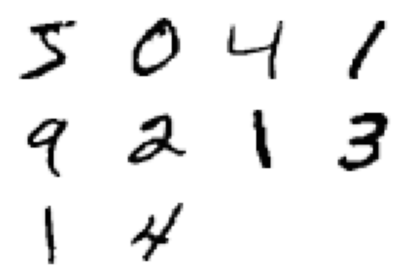

In [3]:
import matplotlib.pyplot as plt
for k in range(10):
    plt.subplot(3,4,k+1)
    plt.imshow(x_train[k],cmap="Greys")
    plt.axis('off')
plt.tight_layout()
plt.show()

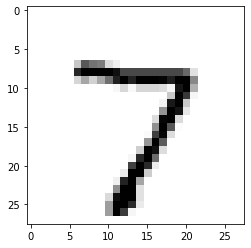

In [4]:
plt.imshow(x_validation[0], cmap='Greys') # for later inference

### Pre-processing
- Reshape
- Normalize (0,1)
- Convert to one hot encoding

In [5]:
# Reshaping
x_train = x_train.reshape(60000, 28*28).astype('float32')
x_validation = x_validation.reshape(10000, 784).astype('float32')

# Normalizing
x_train /= 255
x_validation /=255

# One hot encoding (binarization of labels, ideal output)
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_validation = to_categorical(y_validation, n_classes)

### Neural Network Architecture

In [6]:
model = Sequential()

# Hidden Layers:

# First Hidden Layer:
model.add(Dense(64, activation='relu', input_shape=(28*28,))) 
model.add(BatchNormalization()) # It's a layer of processing added to our first layer 

# Second Hidden Layer:
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

# Third Hidden Layer:
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output Layer:
model.add(Dense(10, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

#### Compile and Train model

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_validation,y_validation))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4024 - accuracy: 0.8792 - val_loss: 0.1507 - val_accuracy: 0.9550
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1544 - accuracy: 0.9540 - val_loss: 0.1143 - val_accuracy: 0.9642
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9657 - val_loss: 0.1000 - val_accuracy: 0.9680
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0885 - accuracy: 0.9733 - val_loss: 0.0949 - val_accuracy: 0.9704
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0767 - accuracy: 0.9760 - val_loss: 0.0960 - val_accuracy: 0.9698
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0636 - accuracy: 0.9797 - val_loss: 0.0866 - val_accuracy: 0.9737
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0574 - accuracy: 0.9810 - val_loss: 0.1001 - val_accuracy: 0.9709
Epoch 

In [8]:
print(model.evaluate(x_validation,y_validation))

313/313 [==============================] - 0s 1ms/step - loss: 0.0902 - accuracy: 0.9778
[0.09019243717193604, 0.9778000116348267]


#### Inference

In [9]:
valid0 = x_validation[0].reshape(1,784)
model.predict(valid0)

array([[5.4805031e-07, 4.9168247e-09, 7.0044183e-07, 2.8203493e-07,
        7.0725250e-08, 2.1810884e-08, 5.0717386e-10, 9.9999714e-01,
        8.9428234e-09, 1.2055665e-06]], dtype=float32)

In [10]:
print(f'The label of valid0 is {model.predict_classes(valid0)[0]}')

The label of valid0 is 7
